<br>
<br>  


<h1 style="text-align: center"> Google Datathon with GDSC NU</h1>
<h2 style="text-align: center"> Task 1. Jusan</h2> 
<img src="https://developers.google.com/community/gdsc/images/gdsc-social-share.png" width="500" height="500">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Официальный_логотип_АО_%22First_Heartland_Jusan_Bank%22.jpg/1200px-Официальный_логотип_АО_%22First_Heartland_Jusan_Bank%22.jpg" width="200" height="200">

<br>
<br>
<br>
<br>


<h3 style="text-align: right">Team:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Moonlight</p> 

<h3 style="text-align: right">Team members:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Bekdaulet Magadanov,</p>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Zhuldyz Amangeldiyeva,</p>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Merey Orazaly</p>

<p style="text-align: center; font-size: 18px; margin-right: 49px;">Astana, 2022</p>

<br>
<br>
<br>

### Outline:
1. Explore the dataset.     
2. Explanatory data analysis. Exploring the features, visualizations.
3. Feature engineering. Preprocess the data.
4. Supervised learning. Build classification models for prediction the segment of the clients. Logistic Regression, Decision Tree, KNN. Tune the hyper parameters, grid search, cross validation.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
import itertools
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

## 1. Explore the dataset.

In [2]:
#Load and observe dataset
df = pd.read_csv('train_data.csv')
df.head(10)

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,monthly_installment,date_close,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,expired_day_express,deal_start_date_express,plan_end_date_express,deal_sum_kzt_product,expired_day_product,deal_start_date_product,plan_end_date_product,transfers_amount_in_9,transfers_count_in_9,transfers_amount_out_9,transfers_count_out_9,transactions_amount_9,transactions_count_9,auth_count_9,salary_9,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,transactions_amount_10,transactions_count_10,auth_count_10,salary_10,transfers_amount_in_8,transfers_count_in_8,transfers_amount_out_8,transfers_count_out_8,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,2152686,17.0,1.0,0.0,0.0,11643.0,130.0,9.0,5.0,1.0,0.080061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1712777,2.0,NaN,0.0,0.0,18095.0,994.0,5.0,5.0,1.0,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,458915,NaN,0.0,0.0,0.0,7955.0,1144.0,7.0,5.0,1.0,NaN,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,0.037251,0.033580,0.033580,NaN,0
3,530220,NaN,0.0,0.0,0.0,22580.0,847.0,0.0,6.0,1.0,0.047791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033579,0.033579,0.079785,0.03358,NaN,NaN,0.033580,NaN,0.033579,0.033579,0.145198,0.03358,NaN,NaN,0.033581,0.036560,NaN,NaN,NaN,NaN,0.115086,0.033581,0.033580,0.092161,0
4,1103654,12.0,0.0,0.0,0.0,13107.0,547.0,12.0,6.0,1.0,0.057000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2251063,8.0,0.0,0.0,NaN,20418.0,203.0,5.0,4.0,1.0,0.115972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,0.213030,0.033580,0.033580,NaN,0
6,1504293,4.0,NaN,0.0,0.0,9899.0,1575.0,6.0,5.0,1.0,0.035940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1185590,17.0,0.0,0.0,0.0,9887.0,732.0,12.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,0.037434,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,0.049205,NaN,NaN,NaN,NaN,0.045491,0.033580,0.033580,0.039529,0
8,1042866,1.0,1.0,0.0,0.0,13477.0,934.0,8.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2210460,8.0,1.0,NaN,NaN,12905.0,334.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,0.034660,0.033580,0.033583,NaN,0


### Description of columns:

- cato_code: код региона проживания
- gender: пол
- country: страна проживания
- citizenship: гражданство
- age_days: возраст в днях
- client_days: клиент банка в течении скольки дней
- opsos_code: код оператора связи
- phone_digits: кол-во различных цифр в номере телефона после кода оператора
- max_dup: максимальная длина повторяющейся подстроки в номере телефона после кода оператора
- monthly_installment: объем ежемесячных платежей
- date_close: дата завершения последнего депозита
- deposit_sum_KZT: сумма депозитов в тенге
- deposit_sum_USD: сумма депозитов в долларах
- deposit_sum_EUR: сумма депозитов в евро
- deal_sum_kzt_express: сумма займов экспресс кредитов в банке
- expired_day_express: кол-во дней просрочки платежей по экспресс кредитам
- deal_start_date_express: дата открытия самого раннего займа
- plan_end_date_express: ожидаемая дата закрытия займа
- deal_sum_kzt_product: сумма займов товарным кредитов в банке
- expired_day_product: кол-во дней просрочки платежей по товарным кредитам
- deal_start_date_product: дата открытия самого раннего товарного займа
- plan_end_date_product: ожидаемая дата закрытия последнего товарного займа
- transfers_amount_in_X: объем поступивших переводов на карту в месяце X
- transfers_count_in_X: кол-во поступивших переводов на карту в месяце X
- transfers_amount_out_X: объем отправленных переводов на карту в месяце X
- transfers_count_out_X: кол-во отправленных переводов на карту в месяце X
- transactions_amount_X: объем карточных транзакций в месяце X
- transactions_count_X: кол-во карточных транзакций в месяце X
- auth_count_X: кол-во успешных авторизаций в месяце X
- salary_X: зарплата в месяце X
- label: целевая категория

In [3]:
import json
  
f = open('info.json', encoding='utf-8')

in_js = json.load(f)
  
info_df = pd.DataFrame(columns={'dtype', 'col_name'})
info_df['col_name'] = in_js["dataset description"]['column types'].keys()
info_df['dtype'] = in_js["dataset description"]['column types'].values()
info_df.dtype.unique()

array(['categorical data', 'float data', 'date'], dtype=object)

In [4]:
print('Categorical data: ', info_df['col_name'].loc[info_df['dtype'] == 'categorical data'].values.tolist(), '\n')
print('Numerical data: ', info_df['col_name'].loc[info_df['dtype'] == 'float data'].values.tolist(), '\n')
print('Date: ', info_df['col_name'].loc[info_df['dtype'] == 'date'].values.tolist())

Categorical data:  ['cato_code', 'gender', 'country', 'citizenship', 'opsos_code', 'label'] 

Numerical data:  ['age_days', 'client_days', 'phone_digits', 'max_dup', 'monthly_installment', 'deposit_sum_KZT', 'deposit_sum_USD', 'deposit_sum_EUR', 'deal_sum_kzt_express', 'expired_day_express', 'deal_sum_kzt_product', 'expired_day_product', 'transfers_amount_in_X', 'transfers_count_in_X', 'transfers_amount_out_X', 'transfers_count_out_X', 'transactions_amount_X', 'transactions_count_X', 'auth_count_X', 'salary_X'] 

Date:  ['date_close', 'deal_start_date_express', 'plan_end_date_express', 'deal_start_date_product', 'plan_end_date_product']


## 3. Explanatory data analysis. Exploring the features, visualizations.

In [5]:
# Check the size of the dataset
df.shape

(941531, 48)

**Comment: There are data about 941,531 clients and 48 characteristics.**

In [6]:
#Function to output info about dataset (nan values, unique values)
def information_about_data(dataframe):
    result = pd.DataFrame({'Column name':dataframe.isnull().sum().index, 
                           'Number of Nan':dataframe.isnull().sum().values,
                           'Procent of Nan':(dataframe.isnull().sum().values/len(dataframe)*100).round(1).astype(str),
                           'Number of unique':dataframe.nunique().values})
    return result

In [7]:
information_about_data(df)

,Column name,Number of Nan,Procent of Nan,Number of unique
0,client_id,0,0.0,941531
1,cato_code,204799,21.8,20
2,gender,71110,7.6,2
3,country,84210,8.9,68
4,citizenship,295715,31.4,96
5,age_days,5478,0.6,26579
6,client_days,4365,0.5,5089
7,opsos_code,15817,1.7,75
8,phone_digits,15817,1.7,7
9,max_dup,15817,1.7,4


In [8]:
# Check duplicates
print('Number of Duplicates: ', df.duplicated().sum())

Number of Duplicates:  0


In [9]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941531 entries, 0 to 941530
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                941531 non-null  int64  
 1   cato_code                736732 non-null  float64
 2   gender                   870421 non-null  float64
 3   country                  857321 non-null  float64
 4   citizenship              645816 non-null  float64
 5   age_days                 936053 non-null  float64
 6   client_days              937166 non-null  float64
 7   opsos_code               925714 non-null  float64
 8   phone_digits             925714 non-null  float64
 9   max_dup                  925714 non-null  float64
 10  monthly_installment      503229 non-null  float64
 11  date_close               32329 non-null   object 
 12  deposit_sum_KZT          90525 non-null   float64
 13  deposit_sum_USD          90525 non-null   float64
 14  depo

In [10]:
# Check summary statistics
df.describe()

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,expired_day_express,deal_sum_kzt_product,expired_day_product,transfers_amount_in_9,transfers_count_in_9,transfers_amount_out_9,transfers_count_out_9,transactions_amount_9,transactions_count_9,auth_count_9,salary_9,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,transactions_amount_10,transactions_count_10,auth_count_10,salary_10,transfers_amount_in_8,transfers_count_in_8,transfers_amount_out_8,transfers_count_out_8,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
count,9.415310e+05,736732.000000,870421.000000,857321.000000,645816.000000,936053.000000,937166.000000,925714.000000,925714.000000,925714.000000,503229.000000,90525.000000,90525.000000,90525.000000,158439.000000,158439.000000,78306.000000,78306.00000,227113.000000,2.271130e+05,227113.000000,2.271130e+05,0.0,0.0,503107.000000,107532.000000,240575.000000,2.405750e+05,240575.000000,2.405750e+05,0.0,0.0,510070.000000,110996.000000,0.0,0.0,0.0,0.0,374804.000000,374804.000000,483457.000000,101332.000000,941531.000000
mean,1.559629e+06,8.536510,0.519033,0.032302,0.121451,13450.740881,946.595329,6.661014,5.012386,1.104161,0.047814,0.164935,0.110017,0.038439,0.119181,30.263672,0.066119,25.84180,0.042784,3.357952e-02,0.065016,3.357979e-02,NaN,NaN,0.033580,0.047130,0.042738,3.357952e-02,0.061722,3.357983e-02,NaN,NaN,0.033580,0.047598,NaN,NaN,NaN,NaN,0.081293,0.033581,0.033580,0.047930,0.013354
std,1.043782e+06,5.799225,0.499638,1.043668,1.809480,4916.583205,968.524819,3.752486,0.952125,0.443487,0.101808,1.365650,1.252795,0.170436,0.081366,128.590414,0.025359,109.76102,0.144202,2.848524e-07,0.342497,6.334009e-07,NaN,NaN,0.000001,0.033487,0.135669,2.671676e-07,0.306526,6.809026e-07,NaN,NaN,0.000001,0.030450,NaN,NaN,NaN,NaN,0.416487,0.000003,0.000001,0.034323,0.114784
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,346.000000,5.000000,0.000000,1.000000,0.000000,0.033579,0.033579,0.033579,0.033579,0.035368,0.000000,0.034176,0.00000,0.033579,3.357946e-02,0.033579,3.357946e-02,NaN,NaN,0.033580,0.033579,0.033579,3.357946e-02,0.033579,3.357946e-02,NaN,NaN,0.033580,0.033579,NaN,NaN,NaN,NaN,0.033579,0.033580,0.033580,0.033579,0.000000
25%,7.915145e+05,4.000000,0.000000,0.000000,0.000000,9599.000000,280.000000,4.000000,4.000000,1.000000,0.036545,0.033654,0.033579,0.033579,0.063390,0.000000,0.045503,0.00000,0.033579,3.357946e-02,0.033872,3.357952e-02,NaN,NaN,0.033580,0.037269,0.033579,3.357946e-02,0.033878,3.357952e-02,NaN,NaN,0.033580,0.037480,NaN,NaN,NaN,NaN,0.037359,0.033580,0.033580,0.037743,0.000000
50%,1.389183e+06,8.000000,1.000000,0.000000,0.000000,12570.000000,591.000000,7.000000,5.000000,1.000000,0.040392,0.034413,0.033579,0.033579,0.093200,0.000000,0.060289,0.00000,0.033579,3.357946e-02,0.036799,3.357958e-02,NaN,NaN,0.033580,0.042522,0.033579,3.357946e-02,0.036620,3.357964e-02,NaN,NaN,0.033580,0.042821,NaN,NaN,NaN,NaN,0.045149,0.033580,0.033580,0.043111,0.000000
75%,2.087383e+06,13.000000,1.000000,0.000000,0.000000,16559.000000,1172.000000,10.000000,6.000000,1.000000,0.047118,0.064220,0.033579,0.033579,0.152820,0.000000,0.082826,0.00000,0.033579,3.357946e-02,0.045983,3.357982e-02,NaN,NaN,0.033580,0.049704,0.033579,3.357946e-02,0.045599,3.357988e-02,NaN,NaN,0.033580,0.050173,NaN,NaN,NaN,NaN,0.064689,0.033580,0.033580,0.050228,0.000000
max,4.455984e+06,20.000000,1.000000,120.000000,145.000000,47349.000000,8450.000000,84.000000,7.000000,3.000000,24.159852,161.444437,180.845772,27.513168,1.248255,4853.000000,0.482191,6651.00000,30.920972,3.361082e-02,45.925367,3.362477e-02,NaN,NaN,0.033630,3.237210,14.965462,3.359413e-02,51.480802,3.363204e-02,NaN,NaN,0.033647,2.831230,NaN,NaN,NaN,NaN,95.587475,0.034451,0.033653,3.789647,1.000000


In [11]:
# Distribution of the target
target = df['label'].value_counts(normalize=True)
target

0    0.986646
1    0.013354
Name: label, dtype: float64

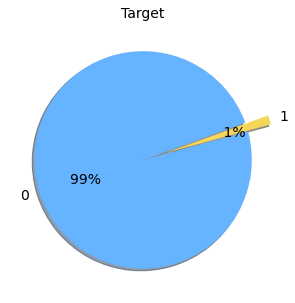

In [12]:
plt.figure(figsize=(5,5))
plt.pie(target,colors = ['#66b3ff','#f4d659'], labels=['0', '1'], explode = (0, 0.22), autopct='%4.0f%%',  textprops={'fontsize': 14}, shadow=True, startangle=20)
plt.title('Target', size = 14)
plt.show()

**Comment:** As can be seen from the pie chart, we have very imbalanced data.

In [13]:
# Take samples from df to correctly see the data from plots
target_0 = df[df['label'] == 0].sample(n = 10000, random_state = 42)
target_1 = df[df['label'] == 1].sample(n = 10000, random_state = 42)
sample = pd.concat([target_1, target_0])

In [14]:
# Features by their dtypes
categorical_features = df[['cato_code', 'gender', 'country', 'citizenship', 'opsos_code']]
date_features = df[['date_close', 'deal_start_date_product', 'plan_end_date_product']]
numerical_features = df[['age_days', 'client_days', 'phone_digits', 'max_dup', 'monthly_installment', 'deposit_sum_KZT', 'deposit_sum_USD', 'deposit_sum_EUR', 'deal_sum_kzt_express', 'expired_day_express', 'deal_sum_kzt_product', 'expired_day_product', 'transfers_amount_in_8', 'transfers_count_in_8', 'transfers_amount_out_8', 'transfers_count_out_8', 'transactions_amount_8', 'transactions_count_8', 'transfers_amount_in_9', 'transfers_count_in_9', 'transfers_amount_out_9', 'transfers_count_out_9', 'transactions_amount_9', 'transactions_count_9', 'transfers_amount_in_10', 'transfers_count_in_10', 'transfers_amount_out_10', 'transfers_count_out_10', 'transactions_amount_10', 'transactions_count_10', 'auth_count_8', 'salary_8', 'auth_count_9', 'salary_9', 'auth_count_10', 'salary_10']]

In [15]:
# Check columns of deposit
df[['deposit_sum_KZT', 'deposit_sum_USD', 'deposit_sum_EUR']].describe()

,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR
count,90525.000000,90525.000000,90525.000000
mean,0.164935,0.110017,0.038439
std,1.365650,1.252795,0.170436
min,0.033579,0.033579,0.033579
25%,0.033654,0.033579,0.033579
50%,0.034413,0.033579,0.033579
75%,0.064220,0.033579,0.033579
max,161.444437,180.845772,27.513168


**Comment:** We have noticed that min value of deposit in 3 currencies is 0.033579, which means it's taken as 0. Because the data was already normalized.

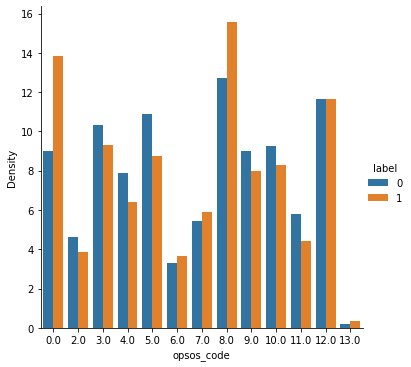

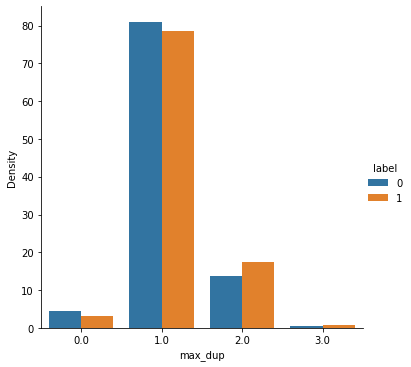

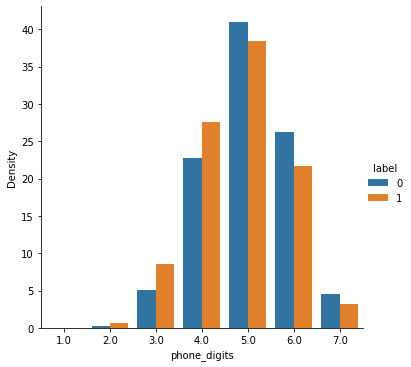

In [16]:
# Check columns about phone numbers
df[df.opsos_code <= 13].groupby(by='label')['opsos_code'].value_counts(normalize=True).mul(100).rename('Density').reset_index().pipe((sns.catplot,'data'), x='opsos_code',y='Density',hue='label',kind='bar')
df.groupby(by='label')['max_dup'].value_counts(normalize=True).mul(100).rename('Density').reset_index().pipe((sns.catplot,'data'), x='max_dup',y='Density',hue='label',kind='bar')
df.groupby(by='label')['phone_digits'].value_counts(normalize=True).mul(100).rename('Density').reset_index().pipe((sns.catplot,'data'), x='phone_digits',y='Density',hue='label',kind='bar')
plt.show()

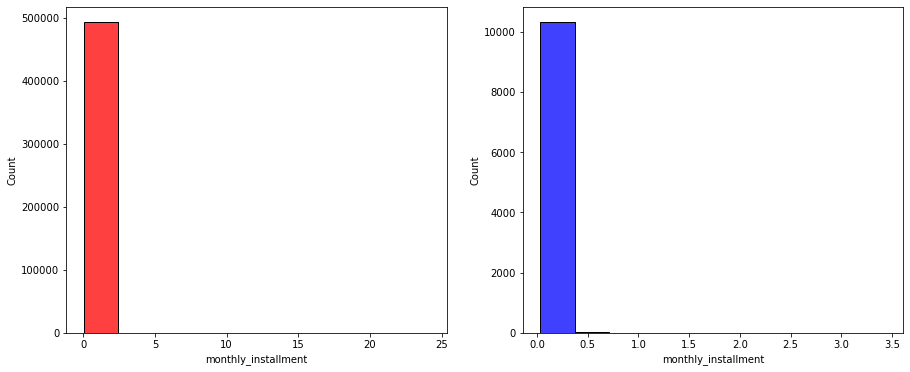

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.histplot(df[df['label']==0].monthly_installment,color='red', bins=10)

plt.subplot(1,2,2)
sns.histplot(df[df['label']==1].monthly_installment,color='blue', bins=10)

plt.show()

## 3. Feature engineering. Preprocess the data.

In [18]:
# Drop unnecessary columns
df.drop(['client_id', 'gender', 'country', 'citizenship', 'client_days', 'max_dup','date_close', 'expired_day_express','transactions_amount_9','transactions_count_9', 'transactions_amount_10','transactions_count_10', 'transfers_amount_in_8', 'transfers_count_in_8','transfers_amount_out_8','transfers_count_out_8'], axis=1, inplace=True)
df.head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_start_date_express,plan_end_date_express,deal_sum_kzt_product,expired_day_product,deal_start_date_product,plan_end_date_product,transfers_amount_in_9,transfers_count_in_9,transfers_amount_out_9,transfers_count_out_9,auth_count_9,salary_9,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,17.0,11643.0,9.0,5.0,0.080061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2.0,18095.0,5.0,5.0,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,7955.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0.037251,0.033580,0.03358,NaN,0
3,NaN,22580.0,0.0,6.0,0.047791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033579,0.033579,0.079785,0.03358,0.03358,NaN,0.033579,0.033579,0.145198,0.03358,0.033581,0.03656,0.115086,0.033581,0.03358,0.092161,0
4,12.0,13107.0,12.0,6.0,0.057000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
df.shape

(941531, 32)

In [20]:
df['deal_start_date_express'] = pd.to_datetime(df.deal_start_date_express)
df['plan_end_date_express'] = pd.to_datetime(df.plan_end_date_express)
df['deal_start_date_product'] = pd.to_datetime(df.deal_start_date_product)
df['plan_end_date_product'] = pd.to_datetime(df.plan_end_date_product)

In [21]:
df['express_month'] = ((df.plan_end_date_express - df.deal_start_date_express)/np.timedelta64(1, 'M'))
df['product_month'] = ((df.plan_end_date_product - df.deal_start_date_product)/np.timedelta64(1, 'M'))
df['express_month'] = df.express_month.apply(np.round).astype('Int64')
df['product_month'] = df.product_month.apply(np.round).astype('Int64')
df[df.express_month.notnull()].head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_start_date_express,plan_end_date_express,deal_sum_kzt_product,expired_day_product,deal_start_date_product,plan_end_date_product,transfers_amount_in_9,transfers_count_in_9,transfers_amount_out_9,transfers_count_out_9,auth_count_9,salary_9,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label,express_month,product_month
11,NaN,9300.0,4.0,3.0,NaN,NaN,NaN,NaN,0.280031,2020-01-09,2027-01-09,NaN,NaN,NaT,NaT,0.033579,0.033579,0.035010,0.03358,0.03358,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0,84,<NA>
12,5.0,14043.0,3.0,5.0,0.034101,NaN,NaN,NaN,0.039541,2021-02-05,2026-02-05,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,0.03370,0.03358,0.03358,NaN,0,60,<NA>
16,1.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,0.194613,2018-08-09,2023-02-09,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0,54,<NA>
26,10.0,14159.0,5.0,4.0,0.065871,NaN,NaN,NaN,0.093200,2022-01-25,2024-01-25,0.056341,110.0,2022-01-31,2023-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,24,12
27,10.0,11874.0,3.0,5.0,0.051533,NaN,NaN,NaN,0.450920,2019-08-02,2025-08-02,NaN,NaN,NaT,NaT,0.033579,0.033579,0.066371,0.03358,0.03358,NaN,0.033579,0.033579,0.067861,0.03358,0.03358,0.076069,0.12869,0.03358,0.03358,NaN,0,72,<NA>


<AxesSubplot:xlabel='label', ylabel='express_month'>

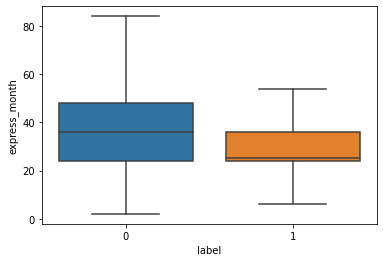

In [22]:
sns.boxplot(x=df.label, y=df.express_month, orient='v', sym='')

<AxesSubplot:xlabel='label', ylabel='product_month'>

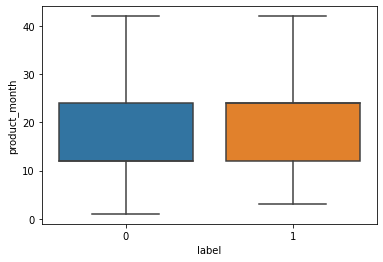

In [23]:
sns.boxplot(x=df.label, y=df.product_month, orient='v', sym='')

In [24]:
df.drop(['deal_start_date_express','plan_end_date_express','deal_start_date_product','plan_end_date_product','product_month'], axis=1, inplace=True)
df.head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_sum_kzt_product,expired_day_product,transfers_amount_in_9,transfers_count_in_9,transfers_amount_out_9,transfers_count_out_9,auth_count_9,salary_9,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label,express_month
0,17.0,11643.0,9.0,5.0,0.080061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>
1,2.0,18095.0,5.0,5.0,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>
2,NaN,7955.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0.037251,0.033580,0.03358,NaN,0,<NA>
3,NaN,22580.0,0.0,6.0,0.047791,NaN,NaN,NaN,NaN,NaN,NaN,0.033579,0.033579,0.079785,0.03358,0.03358,NaN,0.033579,0.033579,0.145198,0.03358,0.033581,0.03656,0.115086,0.033581,0.03358,0.092161,0,<NA>
4,12.0,13107.0,12.0,6.0,0.057000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>


<AxesSubplot:xlabel='label', ylabel='deposit_sum_USD'>

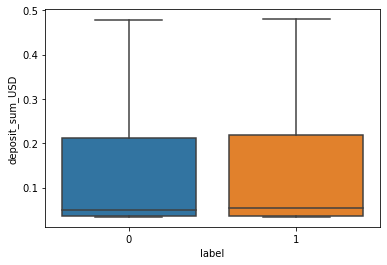

In [25]:
sns.boxplot(x=df[df.deposit_sum_USD > df.deposit_sum_USD.min()].label, y=df[df.deposit_sum_USD > df.deposit_sum_USD.min()].deposit_sum_USD, orient='v', sym='')

<AxesSubplot:xlabel='label', ylabel='deposit_sum_KZT'>

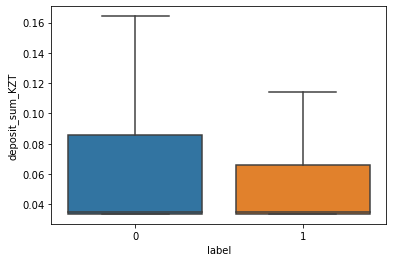

In [26]:
sns.boxplot(x=df[df.deposit_sum_KZT > df.deposit_sum_KZT.min()].label, y=df[df.deposit_sum_KZT > df.deposit_sum_KZT.min()].deposit_sum_KZT, orient='v', sym='')

<AxesSubplot:xlabel='label', ylabel='deposit_sum_EUR'>

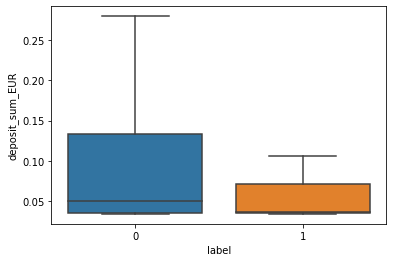

In [27]:
sns.boxplot(x=df[df.deposit_sum_EUR > df.deposit_sum_EUR.min()].label, y=df[df.deposit_sum_EUR > df.deposit_sum_EUR.min()].deposit_sum_EUR, orient='v', sym='')

In [28]:
df[df.deposit_sum_KZT.notnull()].label.value_counts()

0    88590
1     1935
Name: label, dtype: int64

In [29]:
df[df.deposit_sum_EUR > df.deposit_sum_EUR.min()].label.value_counts()

0    2273
1      71
Name: label, dtype: int64

In [30]:
df[df.deposit_sum_EUR > df.deposit_sum_EUR.min()].groupby(by='label').deposit_sum_EUR.mean()

label
0    0.218652
1    0.304137
Name: deposit_sum_EUR, dtype: float64

In [31]:
len(df[(df.deposit_sum_EUR.notnull())&(df.deposit_sum_EUR > 12)&(df.label==0)])

6

<AxesSubplot:xlabel='label', ylabel='auth_count_8'>

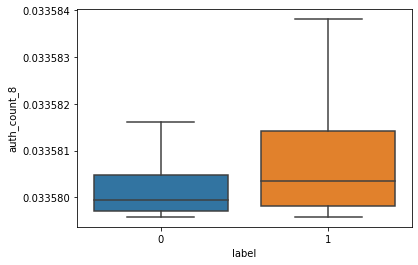

In [32]:
sns.boxplot(x=df[df.auth_count_8 > df.auth_count_8.min()].label, y=df[df.auth_count_8 > df.auth_count_8.min()].auth_count_8, orient='v', sym='')

In [33]:
df[df.auth_count_8 > df.auth_count_8.min()].groupby(by='label').auth_count_8.max()

label
0    0.033653
1    0.033634
Name: auth_count_8, dtype: float64

In [34]:
df[df.auth_count_8.notnull()&(df.auth_count_8==df.auth_count_8.min())].label.value_counts()/df.label.value_counts()

0    0.072233
1    0.046528
Name: label, dtype: float64

<AxesSubplot:xlabel='label', ylabel='auth_count_9'>

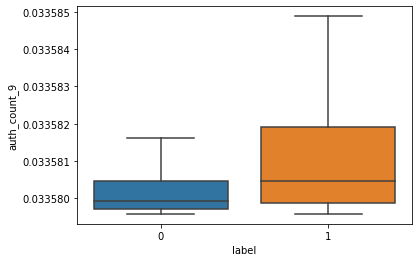

In [35]:
sns.boxplot(x=df[df.auth_count_9 > df.auth_count_9.min()].label, y=df[df.auth_count_9 > df.auth_count_9.min()].auth_count_9, orient='v', sym='')

In [36]:
df[df.auth_count_9 > df.auth_count_9.min()].groupby(by='label').auth_count_9.max()

label
0    0.033630
1    0.033628
Name: auth_count_9, dtype: float64

In [37]:
df[df.auth_count_9.notnull()&(df.auth_count_9==df.auth_count_9.min())].label.value_counts()/df.label.value_counts()

0    0.076202
1    0.045812
Name: label, dtype: float64

<AxesSubplot:xlabel='label', ylabel='salary_8'>

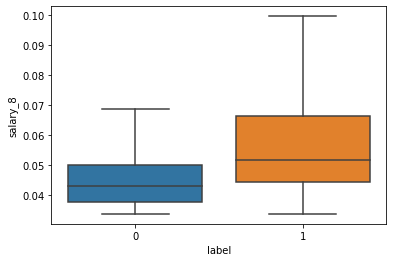

In [38]:
sns.boxplot(x=df[df.salary_8 > df.salary_8.min()].label, y=df[df.salary_8 > df.salary_8.min()].salary_8, orient='v', sym='')

In [39]:
df[df.salary_8 > df.salary_8.min()].groupby(by='label').salary_8.min()

label
0    0.033579
1    0.033591
Name: salary_8, dtype: float64

<AxesSubplot:xlabel='label', ylabel='salary_9'>

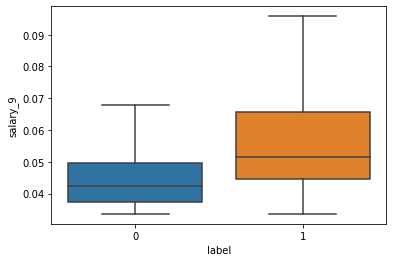

In [40]:
sns.boxplot(x=df[df.salary_9 > df.salary_9.min()].label, y=df[df.salary_9 > df.salary_9.min()].salary_9, orient='v', sym='')

In [41]:
df[df.salary_9 > df.salary_9.min()].groupby(by='label').salary_9.max()

label
0    3.237210
1    1.918379
Name: salary_9, dtype: float64

<AxesSubplot:xlabel='label', ylabel='salary_10'>

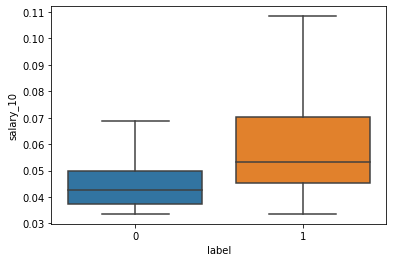

In [42]:
sns.boxplot(x=df[df.salary_10 > df.salary_10.min()].label, y=df[df.salary_10 > df.salary_10.min()].salary_10, orient='v', sym='')

In [43]:
df[df.salary_10 > df.salary_10.min()].groupby(by='label').salary_10.min()

label
0    0.033580
1    0.033631
Name: salary_10, dtype: float64

<AxesSubplot:xlabel='label', ylabel='transfers_amount_in_9'>

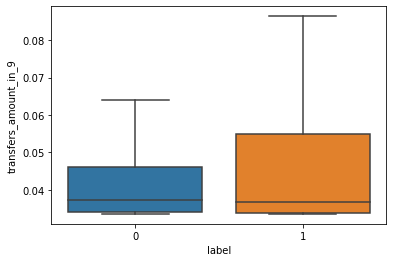

In [44]:
sns.boxplot(x=df[df.transfers_amount_in_9 > df.transfers_amount_in_9.min()].label, y=df[df.transfers_amount_in_9 > df.transfers_amount_in_9.min()].transfers_amount_in_9, orient='v', sym='')

In [45]:
df[df.transfers_amount_in_9 > df.transfers_amount_in_9.min()].groupby(by='label').transfers_amount_in_9.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,45194.0,0.077464,0.315214,0.03358,0.034080,0.037216,0.046100,30.920972
1,2253.0,0.081185,0.265999,0.03358,0.033699,0.036859,0.054834,8.718373


In [46]:
df[df.transactions_count_8 > df.transactions_count_8.min()].groupby(by='label').transactions_count_8.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,346859.0,0.033581,0.000003,0.03358,0.03358,0.03358,0.033580,0.034451
1,9969.0,0.033582,0.000007,0.03358,0.03358,0.03358,0.033582,0.034001


In [47]:
df['transfers_amount_in_x'] = df[['transfers_amount_in_9', 'transfers_amount_in_10']].mean(axis=1)
df['transfers_amount_out_x'] = df[['transfers_amount_out_9', 'transfers_amount_out_10']].mean(axis=1)
df['salary_x'] = df[['salary_8', 'salary_9', 'salary_10']].mean(axis=1)
df.head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_sum_kzt_product,expired_day_product,transfers_amount_in_9,transfers_count_in_9,transfers_amount_out_9,transfers_count_out_9,auth_count_9,salary_9,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label,express_month,transfers_amount_in_x,transfers_amount_out_x,salary_x
0,17.0,11643.0,9.0,5.0,0.080061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>,NaN,NaN,NaN
1,2.0,18095.0,5.0,5.0,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>,NaN,NaN,NaN
2,NaN,7955.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0.037251,0.033580,0.03358,NaN,0,<NA>,NaN,NaN,NaN
3,NaN,22580.0,0.0,6.0,0.047791,NaN,NaN,NaN,NaN,NaN,NaN,0.033579,0.033579,0.079785,0.03358,0.03358,NaN,0.033579,0.033579,0.145198,0.03358,0.033581,0.03656,0.115086,0.033581,0.03358,0.092161,0,<NA>,0.033579,0.112491,0.064361
4,12.0,13107.0,12.0,6.0,0.057000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>,NaN,NaN,NaN


In [48]:
df[df.salary_x > df.salary_x.min()].groupby(by='label').salary_x.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,128367.0,0.046544,0.026956,0.033579,0.037464,0.042448,0.049504,3.237210
1,2033.0,0.067054,0.074244,0.033591,0.045018,0.052432,0.067116,1.673538


In [49]:
df.drop(df.loc[:,'transfers_amount_in_9':'salary_10'].columns, axis=1, inplace=True)
df.drop(['transactions_count_8','auth_count_8','salary_8'], axis=1, inplace=True)
df.head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_sum_kzt_product,expired_day_product,transactions_amount_8,label,express_month,transfers_amount_in_x,transfers_amount_out_x,salary_x
0,17.0,11643.0,9.0,5.0,0.080061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>,NaN,NaN,NaN
1,2.0,18095.0,5.0,5.0,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>,NaN,NaN,NaN
2,NaN,7955.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037251,0,<NA>,NaN,NaN,NaN
3,NaN,22580.0,0.0,6.0,0.047791,NaN,NaN,NaN,NaN,NaN,NaN,0.115086,0,<NA>,0.033579,0.112491,0.064361
4,12.0,13107.0,12.0,6.0,0.057000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>,NaN,NaN,NaN


In [50]:
median_cat = df[['cato_code', 'opsos_code', 'phone_digits', 'express_month']].median()

In [51]:
df[['cato_code', 'opsos_code', 'phone_digits', 'express_month']] = df[['cato_code', 'opsos_code', 'phone_digits', 'express_month']].fillna(median_cat)
df.head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_sum_kzt_product,expired_day_product,transactions_amount_8,label,express_month,transfers_amount_in_x,transfers_amount_out_x,salary_x
0,17.0,11643.0,9.0,5.0,0.080061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,36,NaN,NaN,NaN
1,2.0,18095.0,5.0,5.0,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,36,NaN,NaN,NaN
2,8.0,7955.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037251,0,36,NaN,NaN,NaN
3,8.0,22580.0,0.0,6.0,0.047791,NaN,NaN,NaN,NaN,NaN,NaN,0.115086,0,36,0.033579,0.112491,0.064361
4,12.0,13107.0,12.0,6.0,0.057000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,36,NaN,NaN,NaN


In [52]:
avg_df = {}
for i in df.columns:
    mean = df[df[i]>df.monthly_installment.min()][i].mean()
    avg_df[i] = mean
avg_df

{'cato_code': 8.41980986287228,
 'age_days': 13450.74088112532,
 'opsos_code': 7.317293042005365,
 'phone_digits': 5.0121780376854295,
 'monthly_installment': 0.048539021183933585,
 'deposit_sum_KZT': 0.18540664980308758,
 'deposit_sum_USD': 0.3961589955738982,
 'deposit_sum_EUR': 0.22124178088986088,
 'deal_sum_kzt_express': 0.1191806538746916,
 'deal_sum_kzt_product': 0.06611872694653682,
 'expired_day_product': 166.0022969647252,
 'transactions_amount_8': 0.0812925448297417,
 'label': 1.0,
 'express_month': 35.99991184570662,
 'transfers_amount_in_x': 0.07018643632116811,
 'transfers_amount_out_x': 0.0645160900265126,
 'salary_x': 0.04686361501989586}

In [53]:
df.fillna(value=avg_df, inplace=True)

In [54]:
df.head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_sum_kzt_product,expired_day_product,transactions_amount_8,label,express_month,transfers_amount_in_x,transfers_amount_out_x,salary_x
0,17.0,11643.0,9.0,5.0,0.080061,0.185407,0.396159,0.221242,0.119181,0.066119,166.002297,0.081293,0,36,0.070186,0.064516,0.046864
1,2.0,18095.0,5.0,5.0,0.033579,0.185407,0.396159,0.221242,0.119181,0.066119,166.002297,0.081293,0,36,0.070186,0.064516,0.046864
2,8.0,7955.0,7.0,5.0,0.048539,0.185407,0.396159,0.221242,0.119181,0.066119,166.002297,0.037251,0,36,0.070186,0.064516,0.046864
3,8.0,22580.0,0.0,6.0,0.047791,0.185407,0.396159,0.221242,0.119181,0.066119,166.002297,0.115086,0,36,0.033579,0.112491,0.064361
4,12.0,13107.0,12.0,6.0,0.057000,0.185407,0.396159,0.221242,0.119181,0.066119,166.002297,0.081293,0,36,0.070186,0.064516,0.046864


In [55]:
df.label.value_counts()

0    928958
1     12573
Name: label, dtype: int64

In [56]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    smemory = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(smemory))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type == np.number:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    ememory = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(ememory))
    print('Decreased by {:.1f}%'.format(100 * (smemory - ememory) / smemory))
    
    return df

In [57]:
df = reduce_mem_usage(df.copy())
train = df.copy() 
X = train.drop('label', axis=1)
y = train.label

Memory usage of dataframe is 123.01 MB
Memory usage after optimization is: 28.74 MB
Decreased by 76.6%


In [58]:
train.label.value_counts()

0    928958
1     12573
Name: label, dtype: int64

In [59]:
x_resampled_rus, y_resampled_rus = RandomUnderSampler(random_state=2022).fit_resample(X, y)

print(x_resampled_rus.shape)
print('*'*20)
print(y_resampled_rus.value_counts())

(25146, 16)
********************
0    12573
1    12573
Name: label, dtype: int64


In [60]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,monthly_installment,date_close,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,expired_day_express,deal_start_date_express,plan_end_date_express,deal_sum_kzt_product,expired_day_product,deal_start_date_product,plan_end_date_product,transfers_amount_in_9,transfers_count_in_9,transfers_amount_out_9,transfers_count_out_9,transactions_amount_9,transactions_count_9,auth_count_9,salary_9,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,transactions_amount_10,transactions_count_10,auth_count_10,salary_10,transfers_amount_in_8,transfers_count_in_8,transfers_amount_out_8,transfers_count_out_8,transactions_amount_8,transactions_count_8,auth_count_8,salary_8
0,2,2.0,1.0,0.0,0.0,17150.0,1638.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,3.0,1.0,0.0,NaN,14278.0,416.0,3.0,6.0,1.0,NaN,NaN,0.034253,0.033579,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,4.0,1.0,0.0,NaN,19040.0,225.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033579,0.033579,0.033699,0.03358,NaN,NaN,0.03358,NaN,0.033579,0.033579,0.034671,0.03358,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN,0.057141,0.033580,0.033580,NaN
3,11,4.0,1.0,0.0,0.0,28811.0,2919.0,NaN,NaN,NaN,NaN,NaN,0.353610,0.033579,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27,NaN,0.0,0.0,0.0,26687.0,2919.0,0.0,6.0,1.0,NaN,NaN,0.493290,3.150814,0.033579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132310,0.033580,0.034002,0.03358,NaN,NaN,0.03358,NaN,0.075314,0.033580,0.033681,0.03358,NaN,NaN,0.033581,NaN,NaN,NaN,NaN,NaN,0.157054,0.033583,0.033582,NaN


In [61]:
def preprocess(df, median, avg):
    df.drop(['client_id', 'gender', 'country', 'citizenship', 'client_days', 'max_dup','date_close', 'expired_day_express','transactions_amount_9','transactions_count_9', 'transactions_amount_10','transactions_count_10', 'transfers_amount_in_8', 'transfers_count_in_8','transfers_amount_out_8','transfers_count_out_8'], axis=1, inplace=True)
    df['deal_start_date_express'] = pd.to_datetime(df.deal_start_date_express)
    df['plan_end_date_express'] = pd.to_datetime(df.plan_end_date_express)
    df['deal_start_date_product'] = pd.to_datetime(df.deal_start_date_product)
    df['plan_end_date_product'] = pd.to_datetime(df.plan_end_date_product)
    df['express_month'] = ((df.plan_end_date_express - df.deal_start_date_express)/np.timedelta64(1, 'M'))
    df['product_month'] = ((df.plan_end_date_product - df.deal_start_date_product)/np.timedelta64(1, 'M'))
    df['express_month'] = df.express_month.apply(np.round).astype('Int64')
    df['product_month'] = df.product_month.apply(np.round).astype('Int64')
    
    df.drop(['deal_start_date_express','plan_end_date_express','deal_start_date_product','plan_end_date_product','product_month'], axis=1, inplace=True)
    
    df['transfers_amount_in_x'] = df[['transfers_amount_in_9', 'transfers_amount_in_10']].mean(axis=1)
    df['transfers_amount_out_x'] = df[['transfers_amount_out_9', 'transfers_amount_out_10']].mean(axis=1)
    df['salary_x'] = df[['salary_8', 'salary_9', 'salary_10']].mean(axis=1)

    
    df.drop(df.loc[:,'transfers_amount_in_9':'salary_10'].columns, axis=1, inplace=True)
    df.drop(['transactions_count_8','auth_count_8','salary_8'], axis=1, inplace=True)

    df[['cato_code', 'opsos_code', 'phone_digits', 'express_month']] = df[['cato_code', 'opsos_code', 'phone_digits', 'express_month']].fillna(median)
    df = df.fillna(avg)
    df_return = df.copy()
    return df_return

test = preprocess(test_data, median_cat, avg_df)
test = reduce_mem_usage(test.copy())

Memory usage of dataframe is 57.05 MB
Memory usage after optimization is: 13.71 MB
Decreased by 76.0%


In [62]:
test.head()

,cato_code,age_days,opsos_code,phone_digits,monthly_installment,deposit_sum_KZT,deposit_sum_USD,deposit_sum_EUR,deal_sum_kzt_express,deal_sum_kzt_product,expired_day_product,transactions_amount_8,express_month,transfers_amount_in_x,transfers_amount_out_x,salary_x
0,2.0,17152.0,2.0,3.0,0.048553,0.185425,0.396240,0.221191,0.119202,0.066101,166.0,0.081299,36,0.070190,0.064514,0.046875
1,3.0,14280.0,3.0,6.0,0.048553,0.034241,0.033569,0.033569,0.119202,0.066101,166.0,0.081299,36,0.070190,0.064514,0.046875
2,4.0,19040.0,0.0,5.0,0.048553,0.185425,0.396240,0.221191,0.119202,0.066101,166.0,0.057129,36,0.033569,0.034180,0.046875
3,4.0,28816.0,7.0,5.0,0.048553,0.353516,0.033569,0.033569,0.119202,0.066101,166.0,0.081299,36,0.070190,0.064514,0.046875
4,8.0,26688.0,0.0,6.0,0.048553,0.493408,3.150391,0.033569,0.119202,0.066101,166.0,0.157104,36,0.103821,0.033844,0.046875


## 4. Supervised learning. Build classification models for prediction the segment of the clients. Logistic Regression, Decision Tree, KNN.

## Logistic Regression

In [64]:
lg_us = LogisticRegression().fit(x_resampled_rus, y_resampled_rus)
y_pred = lg_us.predict(x_resampled_rus)
con_df = pd.DataFrame(data=confusion_matrix(y_resampled_rus, y_pred),  
                      columns=[" Predicted NO", " Predicted YES"],
                      index=[" True NO", " True YES"])

print(con_df)

print(" ")
print("-"*20)
print(" ")

print(classification_report(y_resampled_rus, y_pred))

            Predicted NO   Predicted YES
 True NO           11389            1184
 True YES           5355            7218
 
--------------------
 
              precision    recall  f1-score   support

           0       0.68      0.91      0.78     12573
           1       0.86      0.57      0.69     12573

    accuracy                           0.74     25146
   macro avg       0.77      0.74      0.73     25146
weighted avg       0.77      0.74      0.73     25146



In [65]:
log_par = {'C': [0.0001, 0.001,0.01, 0.1], 
           'penalty': ['l1','l2'], 
           'solver': ['newton-cg', 'lbfgs']}

In [66]:
grid = GridSearchCV(LogisticRegression(), log_par, cv=5, verbose=True, n_jobs=-1, scoring='roc_auc')
grid.fit(x_resampled_rus, y_resampled_rus)
print("score: {:.3f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
score: 0.791
best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [67]:
best_lg = grid.best_estimator_.fit(x_resampled_rus, y_resampled_rus)
best_lg_ypred = best_lg.predict(x_resampled_rus)
print(pd.DataFrame(data=confusion_matrix(y_resampled_rus, y_pred),  
                      columns=[" Predicted NO", " Predicted YES"],
                      index=[" True NO", " True YES"]))
print(classification_report(y_resampled_rus, best_lg_ypred))

            Predicted NO   Predicted YES
 True NO           11389            1184
 True YES           5355            7218
              precision    recall  f1-score   support

           0       0.72      0.84      0.78     12573
           1       0.81      0.68      0.74     12573

    accuracy                           0.76     25146
   macro avg       0.77      0.76      0.76     25146
weighted avg       0.77      0.76      0.76     25146



In [68]:
best_pred = best_lg.predict(test)

In [69]:
pd.DataFrame({'id': pd.read_csv('test_data.csv').client_id, 'target': best_pred}).target.value_counts()

0    387316
1     76423
Name: target, dtype: int64

## Decision Tree

In [85]:
# DecisionTreeClassifier
param_tree = dict({'criterion':['gini','entropy'],
                   'splitter':['best', 'random'],
                   'max_depth':[10,15,20,25,30,35,40]})

dtreeu_gscv = GridSearchCV(DecisionTreeClassifier(), param_tree, scoring = 'f1', cv=5)
dtreeu_gscv.fit(x_resampled_rus, y_resampled_rus)
dtreeu_gscv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [86]:
best_dtree = dtreeu_gscv.best_estimator_.fit(x_resampled_rus, y_resampled_rus)
best_dtree_ypred = best_dtree.predict(x_resampled_rus)
print(pd.DataFrame(data=confusion_matrix(y_resampled_rus, best_dtree_ypred),  
                      columns=[" Predicted NO", " Predicted YES"],
                      index=[" True NO", " True YES"]))

print(classification_report(y_resampled_rus, best_dtree_ypred))

            Predicted NO   Predicted YES
 True NO           11108            1465
 True YES           1579           10994
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12573
           1       0.88      0.87      0.88     12573

    accuracy                           0.88     25146
   macro avg       0.88      0.88      0.88     25146
weighted avg       0.88      0.88      0.88     25146



In [88]:
best_dtree_pred = best_dtree.predict(test)

In [89]:
pd.DataFrame({'id': pd.read_csv('test_data.csv').client_id, 'target': best_dtree_pred}).target.value_counts()

0    392438
1     71301
Name: target, dtype: int64

## KNN

In [74]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_resampled_rus, y_resampled_rus)
y_pred = neigh.predict(x_resampled_rus)
con_df = pd.DataFrame(data=confusion_matrix(y_resampled_rus, y_pred),  
                      columns=[" Predicted NO", " Predicted YES"],
                      index=[" True NO", " True YES"])

print(con_df)

print(" ")
print("-"*20)
print(" ")

print(classification_report(y_pred, y_resampled_rus))

            Predicted NO   Predicted YES
 True NO           10974            1599
 True YES           3008            9565
 
--------------------
 
              precision    recall  f1-score   support

           0       0.87      0.78      0.83     13982
           1       0.76      0.86      0.81     11164

    accuracy                           0.82     25146
   macro avg       0.82      0.82      0.82     25146
weighted avg       0.82      0.82      0.82     25146



In [75]:
knn_pred = neigh.predict(test)

In [76]:
pd.DataFrame({'id': pd.read_csv('test_data.csv').client_id, 'target': knn_pred}).to_csv('submission10.csv', index=False)

In [77]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_resampled_rus, y_resampled_rus)
y_pred = neigh.predict(x_resampled_rus)
con_df = pd.DataFrame(data=confusion_matrix(y_resampled_rus, y_pred),  
                      columns=[" Predicted NO", " Predicted YES"],
                      index=[" True NO", " True YES"])

print(con_df)

print(" ")
print("-"*20)
print(" ")

print(classification_report(y_pred, y_resampled_rus))

            Predicted NO   Predicted YES
 True NO           11061            1512
 True YES           2329           10244
 
--------------------
 
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     13390
           1       0.81      0.87      0.84     11756

    accuracy                           0.85     25146
   macro avg       0.85      0.85      0.85     25146
weighted avg       0.85      0.85      0.85     25146



In [78]:
knn_par = {
    'n_neighbors':[i for i in range(3, 16, 2)],
    'algorithm':['ball_tree', 'kd_tree'],
    'leaf_size':[30, 50]
}

In [79]:
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_par, cv=5, verbose=True, n_jobs=-1, scoring='roc_auc')
grid_knn.fit(x_resampled_rus, y_resampled_rus)
print("score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: ", grid_knn.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
score: 0.806
best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 15}


In [80]:
best_knn = grid_knn.best_estimator_.fit(x_resampled_rus, y_resampled_rus)
best_knn_ypred = best_knn.predict(x_resampled_rus)
print(pd.DataFrame(data=confusion_matrix(y_resampled_rus, best_knn_ypred),  
                      columns=[" Predicted NO", " Predicted YES"],
                      index=[" True NO", " True YES"]))
print(classification_report(y_resampled_rus, best_knn_ypred))

            Predicted NO   Predicted YES
 True NO           11216            1357
 True YES           4171            8402
              precision    recall  f1-score   support

           0       0.73      0.89      0.80     12573
           1       0.86      0.67      0.75     12573

    accuracy                           0.78     25146
   macro avg       0.79      0.78      0.78     25146
weighted avg       0.79      0.78      0.78     25146



In [81]:
best_knn_pred = best_knn.predict(test)

In [82]:
pd.DataFrame({'id': pd.read_csv('test_data.csv').client_id, 'target': best_knn_pred}).target.value_counts()

0    404944
1     58795
Name: target, dtype: int64

In [83]:
pd.DataFrame({'id': pd.read_csv('test_data.csv').client_id, 'target': best_knn_pred}).to_csv('submission9.csv', index=False)

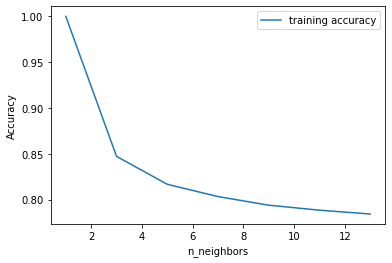

In [84]:
training_accuracy = [] 
neighbors_settings = range(1, 15, 2)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(x_resampled_rus, y_resampled_rus)
    # record training set accuracy 
    training_accuracy.append(clf.score(x_resampled_rus, y_resampled_rus)) 
    
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()